## Analyzing anime
### Bente van Ingen s5724090
In this notebook I will analyze a dataset about data from My Anime List (MAL), a popular website for tracking, rating and sharing opinions with others about anime's users have watched.

In [1]:
#first, I downloaded some useful libraries.
import pandas as pd
import os
import seaborn as sns

In [23]:
#I made sure python read the csv file with the dataset with all the anime's.
#I deleted the columns with links to the website of MAL, since I will not be using those.
animes=pd.read_csv(r"C:\Users\bente\Documents\Master Groningen\Collecting Data\MAL_dataset\animes.csv", encoding='unicode_escape')
animes=animes.drop(columns='link')
animes=animes.drop(columns='img_url')

In [24]:
#Here are the column names for the table: animes
#note that the difference between ranked and popularity is as follows: ranked is based on the users' scores.
#popularity signifies how many users have the anime in their watch list.
animes.columns

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score'],
      dtype='object')

In [26]:
#Here you can see some entries in the dataset
animes.head(5)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyssâa gaping chasm stretching down int...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


In [31]:
#I repeated the process for the profiles file and got rid of the column with links to the MAL website
profiles=pd.read_csv(r"C:\Users\bente\Documents\Master Groningen\Collecting Data\MAL_dataset\profiles.csv", encoding='unicode_escape')
profiles=profiles.drop(columns='link')

In [32]:
#Here are the column names for the table: profiles
profiles.columns

Index(['profile', 'gender', 'birthday', 'favorites_anime'], dtype='object')

In [33]:
profiles.head(5)

,profile,gender,birthday,favorites_anime
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2..."
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925..."
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32..."
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']"
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382..."


In [35]:
#I repeated the process for the reviews file and got rid of the columns I will not use. 'text' was empty so I deleted it.
reviews=pd.read_csv(r"C:\Users\bente\Documents\Master Groningen\Collecting Data\MAL_dataset\reviews.csv", encoding='utf-8')
reviews=reviews.drop(columns='link')
reviews=reviews.drop(columns='text')

In [36]:
#Here are the column names for the table: reviews
#Note that 'scores' is a more elaborate version of score
reviews.columns

Index(['uid', 'profile', 'anime_uid', 'score', 'scores'], dtype='object')

In [38]:
#here are the first 5 rows of the dataset with reviews
reviews.head(5)

,uid,profile,anime_uid,score,scores
0,255938,DesolatePsyche,34096,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."
1,259117,baekbeans,34599,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
2,253664,skrn,28891,7,"{'Overall': '7', 'Story': '7', 'Animation': '9..."
3,8254,edgewalker00,2904,9,"{'Overall': '9', 'Story': '9', 'Animation': '9..."
4,291149,aManOfCulture99,4181,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."


In [39]:
#Lastly I made a table where I combine all 3
#First I merged the reviews and anime tables on the mutual column 'uid'
anime_reviews=pd.merge(reviews, animes, on='uid')
#Then I merged that table with profiles on the mutual column 'profile'
all_tables=pd.merge(anime_reviews, profiles, on='profile')
#And I changed column names that had an imbiguous meaning 
all_tables= all_tables.rename(columns={'score_x': 'user score',
'score_y': 'platform_score'})

In [40]:
#These are all the columns in this dataset
all_tables.columns

Index(['uid', 'profile', 'anime_uid', 'user score', 'scores', 'title',
       'synopsis', 'genre', 'aired', 'episodes', 'members', 'popularity',
       'ranked', 'platform_score', 'gender', 'birthday', 'favorites_anime'],
      dtype='object')

In [42]:
#here are the first 5 rows of the merged version of all tables
all_tables.head(5)

,uid,profile,anime_uid,user score,scores,title,synopsis,genre,aired,episodes,members,popularity,ranked,platform_score,gender,birthday,favorites_anime
0,29323,Slushpuppy282,7588,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360,11732,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
1,29323,Slushpuppy282,7588,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360,11732,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
2,29323,Slushpuppy282,7588,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360,11732,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
3,29323,Slushpuppy282,7588,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360,11732,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
4,30968,ParaParaJMo,1253,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,100,15323,12764.0,6.7,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']"


In [274]:
#Since the values of the genre column in animes are lists in which the genres are surrounded by apostrophes, I used .apply(eval) to itterate over the genres.
# you can read more about lists as values here: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
anime_genres=animes['genre'].apply(eval)
def get_genres(column):
    genre_dic={}
    for list in column:
        for genre in list:
            if genre not in genre_dic:
                genre_dic[genre]= 0
            genre_dic[genre]+= 1
    return genre_dic
frequencies_genres=get_genres(anime_genres)
print(frequencies_genres)

{'Comedy': 6461, 'Sports': 811, 'Drama': 3004, 'School': 1912, 'Shounen': 2322, 'Music': 1993, 'Romance': 2152, 'Sci-Fi': 2832, 'Adventure': 3143, 'Mystery': 874, 'Fantasy': 3466, 'Action': 4215, 'Military': 678, 'Magic': 1174, 'Supernatural': 1719, 'Vampire': 165, 'Slice of Life': 2056, 'Demons': 605, 'Historical': 1218, 'Super Power': 716, 'Mecha': 1197, 'Parody': 702, 'Samurai': 238, 'Seinen': 982, 'Police': 301, 'Psychological': 415, 'Josei': 115, 'Space': 564, 'Kids': 2549, 'Shoujo Ai': 87, 'Ecchi': 805, 'Shoujo': 788, 'Horror': 511, 'Shounen Ai': 113, 'Cars': 133, 'Martial Arts': 424, 'Game': 395, 'Thriller': 161, 'Dementia': 419, 'Harem': 435, 'Hentai': 2574, 'Yaoi': 78, 'Yuri': 79}


## Research questions
 ### Question 1: How many genres are there on My Anime List? And which genre has the most anime's?

##### There are 43 genres in MAL, however, one anime can be a part of several genres. The genre 'Comedy' has the largest frequency, therefore being the most often made genre of anime.

In [284]:
len(frequencies_genres)
sorted(frequencies_genres.items(), key=lambda x:x[1], reverse=True)

[('Comedy', 6461),
 ('Action', 4215),
 ('Fantasy', 3466),
 ('Adventure', 3143),
 ('Drama', 3004),
 ('Sci-Fi', 2832),
 ('Hentai', 2574),
 ('Kids', 2549),
 ('Shounen', 2322),
 ('Romance', 2152),
 ('Slice of Life', 2056),
 ('Music', 1993),
 ('School', 1912),
 ('Supernatural', 1719),
 ('Historical', 1218),
 ('Mecha', 1197),
 ('Magic', 1174),
 ('Seinen', 982),
 ('Mystery', 874),
 ('Sports', 811),
 ('Ecchi', 805),
 ('Shoujo', 788),
 ('Super Power', 716),
 ('Parody', 702),
 ('Military', 678),
 ('Demons', 605),
 ('Space', 564),
 ('Horror', 511),
 ('Harem', 435),
 ('Martial Arts', 424),
 ('Dementia', 419),
 ('Psychological', 415),
 ('Game', 395),
 ('Police', 301),
 ('Samurai', 238),
 ('Vampire', 165),
 ('Thriller', 161),
 ('Cars', 133),
 ('Josei', 115),
 ('Shounen Ai', 113),
 ('Shoujo Ai', 87),
 ('Yuri', 79),
 ('Yaoi', 78)]

### Question 2: Is there a correlation between the amount of episodes and the popularity?
#### Note that with popularity, the lower the score, the more users have it in their watch list.

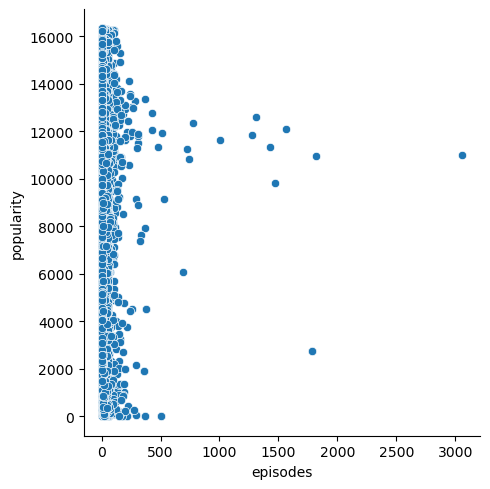

In [291]:
#To test the hypothesis: 'Is there a correlation beteween amount of episodes and popularity?' I made a scatter plot.
sns.relplot(x='episodes', y='popularity', data=animes)

### Answer
#### Anime's with a less amount of episodes seem to be slightly more added to the watch list of users. Many anime's have 12 episodes so this is not surprising. 
#### Furthermore we can see that anime's with between 500 and 2000 episodes are less popular. 

### Now let's see if we can see a difference among the genders in voting behaviour
#### It seems as though Male identifying users are more generous with their scores.

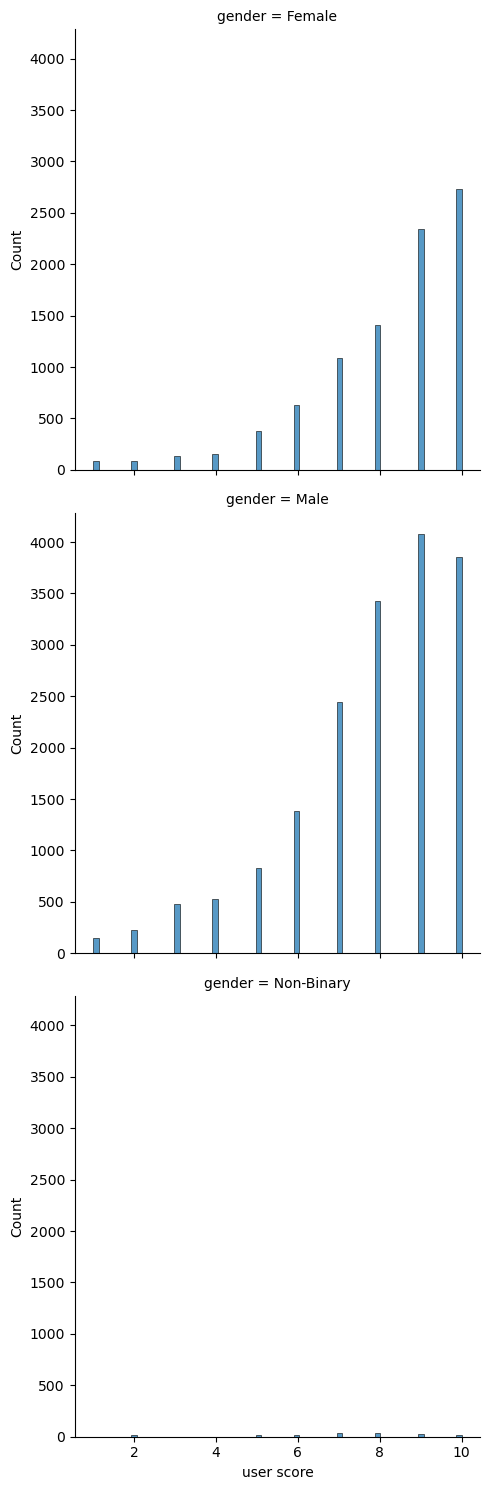

In [334]:
sns.displot(x='user score', row='gender', data=all_tables)